<a href="https://colab.research.google.com/github/obeabi/ProjectPortfolio/blob/master/MainForestFires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Title: Forest Fires 
### Written by: Abiola Obembe
### Date: 25-08-2020
### Project Objective : to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data


## Data Preprocessing

In [1]:
# Install packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
print("libraries installed successfully!")

libraries installed successfully!


In [2]:
# Load dataset
dataset = pd.read_csv('forestfires.csv')

print("The total number of missing values is" , dataset.isnull().sum().sum())


The total number of missing values is 0


In [3]:
# Examine data types in dataframe
dataset.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [4]:
# Extract the non-text data type and perform exploratory analysis
df = dataset[['FFMC', 'DMC','DC', 'ISI', 'temp','RH', 'wind','rain','area']]
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
# obtain statiscticall summary
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
# Evaluate correlation matrix
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


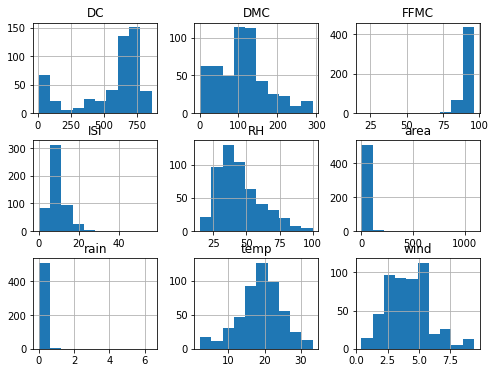

In [7]:
# Visual exploration via histograms
df.hist(figsize=(8,6))
plt.show()

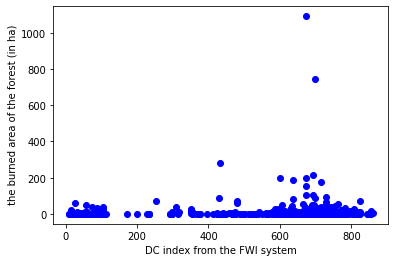

In [8]:
# Visual exploration via scatter plots
plt.scatter(df.DC, df.area, c = 'blue')
plt.xlabel('DC index from the FWI system')
plt.ylabel(' the burned area of the forest (in ha)')
plt.show()

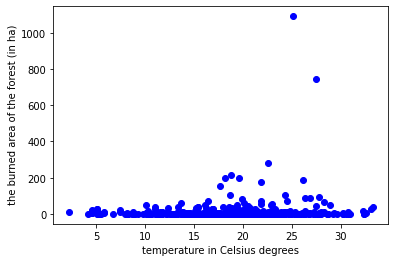

In [9]:
# Visual exploration via scatter plots
plt.scatter(df.temp, df.area, c = 'blue')
plt.xlabel('temperature in Celsius degrees')
plt.ylabel(' the burned area of the forest (in ha)')
plt.show()

In [10]:
# Statistical summary of complete dataset
dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [11]:
# Split dataframe into X and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X.shape)
print(y.shape)
print("The total number of rows in the feature X dataset is" + " " +  str(X.shape[0]))
print("The total number of attributes in X is" + " " +  str(X.shape[1]))
print("The total number of observations in y is" + " " + str(X.shape[1]))

(517, 12)
(517,)
The total number of rows in the feature X dataset is 517
The total number of attributes in X is 12
The total number of observations in y is 12


In [12]:
# print first few rows of X
print(X[0:3,:])

[[7 5 'mar' 'fri' 86.2 26.2 94.3 5.1 8.2 51 6.7 0.0]
 [7 4 'oct' 'tue' 90.6 35.4 669.1 6.7 18.0 33 0.9 0.0]
 [7 4 'oct' 'sat' 90.6 43.7 686.9 6.7 14.6 33 1.3 0.0]]


In [13]:
# print first few rows of y
print(y[0:5])

[0. 0. 0. 0. 0.]


In [14]:
# Taking care of categorical data in X (i.e. Encoding the Independent Variable)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2, 3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[0:3])
print("The new shape of feature matrix X after encoding is ",  X.shape)

[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0
  0.0 7 5 86.2 26.2 94.3 5.1 8.2 51 6.7 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0
  0.0 7 4 90.6 35.4 669.1 6.7 18.0 33 0.9 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 7 4 90.6 43.7 686.9 6.7 14.6 33 1.3 0.0]]
The new shape of feature matrix X after encoding is  (517, 29)


In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(413, 29)
(104, 29)
(413,)
(104,)


## Model 1: Multiple Linear Regression

In [16]:
# Train Model 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("	The coefficient of determination R^2 of the prediction.:", regressor.score(X_train,y_train))

	The coefficient of determination R^2 of the prediction.: 0.05293535775223334


In [17]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-7.93e-01  5.20e-01]
 [ 1.82e+01  0.00e+00]
 [-1.78e+00  0.00e+00]
 [ 1.08e+01  3.59e+01]
 [ 1.15e+01  3.77e+01]
 [ 1.21e+01  0.00e+00]
 [ 2.74e+01  1.69e+00]
 [ 6.34e+00  0.00e+00]
 [ 2.22e+00  0.00e+00]
 [ 5.05e+01  3.95e+00]
 [ 2.04e+01  0.00e+00]
 [ 1.79e+01  0.00e+00]
 [ 3.96e+00  1.10e+00]
 [ 5.36e+00  0.00e+00]
 [ 3.95e+01  0.00e+00]
 [ 1.28e+01  0.00e+00]
 [ 1.72e+01  0.00e+00]
 [ 5.90e+00  7.31e+00]
 [ 3.10e+00  6.44e+00]
 [-6.68e+00  3.19e+00]
 [ 3.62e+01  1.11e+01]
 [-9.67e+00  0.00e+00]
 [-3.21e+00  3.71e+00]
 [ 1.93e+01  3.20e+00]
 [ 9.38e+00  0.00e+00]
 [ 1.58e+01  0.00e+00]
 [ 2.03e+01  0.00e+00]
 [ 2.65e+01  7.80e+00]
 [ 3.01e+00  0.00e+00]
 [ 1.90e+01  3.70e+01]
 [ 1.47e+01  9.96e+00]
 [ 6.65e+00  0.00e+00]
 [ 1.12e+01  0.00e+00]
 [ 1.66e+01  7.04e+00]
 [ 2.71e+01  1.03e+02]
 [ 1.81e+01  7.30e+00]
 [ 5.81e+00  1.58e+00]
 [ 2.91e+01  1.94e+00]
 [ 8.12e-01  8.71e+00]
 [ 1.09e+01  9.00e-02]
 [ 1.12e+01  2.46e+01]
 [-7.79e+00  0.00e+00]
 [ 3.00e+01  4.85e+01]
 [-7.09e+00

In [18]:
# Evaluate accuracy of model for training set
from sklearn.metrics import r2_score
print("The r2_score for linear regression model is:", r2_score(y_pred,y_test))

The r2_score for linear regression model is: -36.9466077018298


##### Evaluating the fit of the model on the training set, we can clearly note that the model is bias (i.e. it fits the training set poorly). Therefore, it is not surprising to observe the poor result from the test set.

## Model 2: Polynomial Regression

In [19]:
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
print("The coefficient of determination R^2 of the prediction:",lin_reg_2.score(X_poly, y_train))

The coefficient of determination R^2 of the prediction: 0.9998871774268282


In [20]:
# Predicting the Test set results
y_pred = lin_reg_2.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1.48e+03  5.20e-01]
 [ 1.66e+02  0.00e+00]
 [ 1.20e+03  0.00e+00]
 [-5.69e+02  3.59e+01]
 [ 3.24e+02  3.77e+01]
 [-6.97e+03  0.00e+00]
 [ 5.28e-10  1.69e+00]
 [-1.89e+03  0.00e+00]
 [ 5.03e+03  0.00e+00]
 [-4.37e+03  3.95e+00]
 [-4.62e+02  0.00e+00]
 [ 3.52e+02  0.00e+00]
 [ 7.21e+02  1.10e+00]
 [ 1.87e+02  0.00e+00]
 [ 1.39e+02  0.00e+00]
 [-4.27e+01  0.00e+00]
 [-2.98e+02  0.00e+00]
 [ 6.76e+01  7.31e+00]
 [-1.50e+03  6.44e+00]
 [ 1.48e+03  3.19e+00]
 [ 1.70e+02  1.11e+01]
 [-4.42e+02  0.00e+00]
 [ 3.80e-10  3.71e+00]
 [-4.35e+02  3.20e+00]
 [-4.21e+02  0.00e+00]
 [ 4.59e+02  0.00e+00]
 [ 1.38e+02  0.00e+00]
 [-4.72e+02  7.80e+00]
 [ 1.45e+01  0.00e+00]
 [-1.19e+04  3.70e+01]
 [ 8.82e+02  9.96e+00]
 [-1.77e+03  0.00e+00]
 [ 4.98e+01  0.00e+00]
 [-2.82e+02  7.04e+00]
 [-8.43e+00  1.03e+02]
 [-1.21e+02  7.30e+00]
 [-3.01e+02  1.58e+00]
 [-1.36e+02  1.94e+00]
 [ 1.00e+01  8.71e+00]
 [ 8.84e+01  9.00e-02]
 [-3.05e+02  2.46e+01]
 [-9.50e+02  0.00e+00]
 [-1.24e+02  4.85e+01]
 [ 4.51e+02

In [21]:
# Evaluate accuracy of model for test set
from sklearn.metrics import r2_score
print("The r2_score for polynomial regression model of degree 3  is:", r2_score(y_pred,y_test))

The r2_score for polynomial regression model of degree 3  is: -0.023646537072645524


##### Evaluating the fit of the model on the training set, we can clearly note that the model fits well with the trianing data; however, the test set accuracy indicates the model does not genarluze well to untrained data. In fact, the negative value for R squared indicates an arbitarirly worse model. 

## Model 3: Decision Tree Regression

In [22]:
# Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
print("	The coefficient of determination R^2 of the prediction.:", regressor.score(X_train,y_train))

	The coefficient of determination R^2 of the prediction.: 0.9998871774268282


In [23]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3.09e+00 5.20e-01]
 [3.50e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 3.59e+01]
 [4.88e+00 3.77e+01]
 [2.21e+00 0.00e+00]
 [0.00e+00 1.69e+00]
 [0.00e+00 0.00e+00]
 [1.96e+02 0.00e+00]
 [0.00e+00 3.95e+00]
 [1.22e+01 0.00e+00]
 [2.74e+01 0.00e+00]
 [3.35e+00 1.10e+00]
 [8.68e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [2.13e+00 0.00e+00]
 [3.44e+01 0.00e+00]
 [1.75e+00 7.31e+00]
 [0.00e+00 6.44e+00]
 [7.50e-01 3.19e+00]
 [2.21e+00 1.11e+01]
 [7.50e-01 0.00e+00]
 [0.00e+00 3.71e+00]
 [2.44e+00 3.20e+00]
 [4.41e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [1.46e+01 0.00e+00]
 [0.00e+00 7.80e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 3.70e+01]
 [0.00e+00 9.96e+00]
 [7.02e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 7.04e+00]
 [5.97e+00 1.03e+02]
 [1.15e+01 7.30e+00]
 [1.47e+00 1.58e+00]
 [2.60e+01 1.94e+00]
 [1.00e+01 8.71e+00]
 [2.44e+00 9.00e-02]
 [4.95e+00 2.46e+01]
 [0.00e+00 0.00e+00]
 [2.57e+00 4.85e+01]
 [0.00e+00 2.47e+00]
 [8.02e+00 3.32e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 4.67e+01]
 [7.40e+00 1.

In [24]:
# Evaluate accuracy of model for test set
from sklearn.metrics import r2_score
print("The r2_score for decison tree regression model is:", r2_score(y_pred,y_test))

The r2_score for decison tree regression model is: -12.731453460711872


##### Evaluating the fit of the model on the training set, we can clearly note that the model fits well with the trianing data; however, the test set accuracy indicates the model does not genarluze well to untrained data. In fact, the negative value for R squared indicates an arbitarirly worse model. It is clear that something special needs to be done to improve the model from fitting with untrained data.

## Model 4: Multiple Linear Regression but with log transformation on target variable

In [25]:
# Examine X dataset
print(X)
print(X.shape)


[[0.0 0.0 0.0 ... 51 6.7 0.0]
 [0.0 0.0 0.0 ... 33 0.9 0.0]
 [0.0 0.0 0.0 ... 33 1.3 0.0]
 ...
 [0.0 1.0 0.0 ... 70 6.7 0.0]
 [0.0 1.0 0.0 ... 42 4.0 0.0]
 [0.0 0.0 0.0 ... 31 4.5 0.0]]
(517, 29)


(517,)


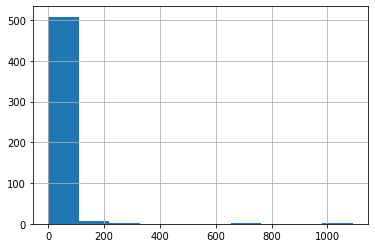

In [26]:
# Examine and plot the  target variable y
print(y.shape)
dataset["area"].hist()
plt.show()

In [29]:
# Transform the y varaible using a log transformation
y_trans = np.log2(y)
dataset["area_trans"] = y_trans
dataset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_trans
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,-inf
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,-inf
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,-inf
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,-inf
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,-inf


In [ ]:
# Examine and plot the transformed target variable y
dataset["area_trans"].hist()
plt.show()

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# Train Model 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("	The coefficient of determination R^2 of the prediction.:", regressor.score(X_train,y_train))

## Model 5: Multiple Linear Regression

## Model 6: Multiple Linear Regression